In [91]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


**Create new features**

In [5]:
# Holiday or not ? 

df["holiday_binary"] = df["holiday"].apply(lambda x: 0 if x=="None" else 1)

In [6]:
# Convert kelvin temperature to celsius and remove temperatures that under -30 celsius 

df["temp_celsius"] = df["temp"] - 273.15

df = df[~(df["temp_celsius"]<-30)]

In [8]:
# Make date_time, index of the dataframe.

df["date_time"] = pd.to_datetime(df["date_time"])

df.index = df["date_time"]
df.index.name = ""
df.drop("date_time", axis=1, inplace=True)

In [19]:
# Create additional time series columns 

df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.weekofyear

In [22]:
# Creating a new feature work_status it indicates if the hour is a work hour or rest hour.

df["work_status"] = df["hour"].apply(lambda x:"working hour" if (x>=9 and x<=17) else "rest hour")

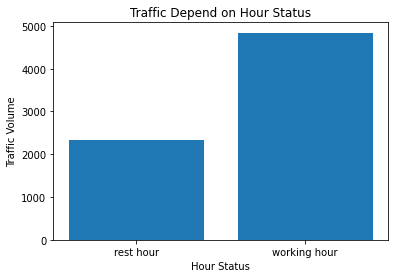

In [31]:
plt.bar(df.groupby("work_status")["traffic_volume"].mean().keys(),
        df.groupby("work_status")["traffic_volume"].mean().values)
plt.ylabel("Traffic Volume")
plt.xlabel("Hour Status")
plt.title("Traffic Depend on Hour Status")
plt.show()

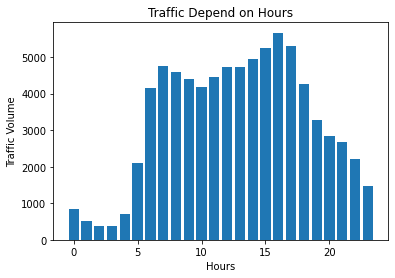

In [32]:
plt.bar(df.groupby("hour")["traffic_volume"].mean().keys(),
        df.groupby("hour")["traffic_volume"].mean().values)
plt.ylabel("Traffic Volume")
plt.xlabel("Hours")
plt.title("Traffic Depend on Hours")
plt.show()

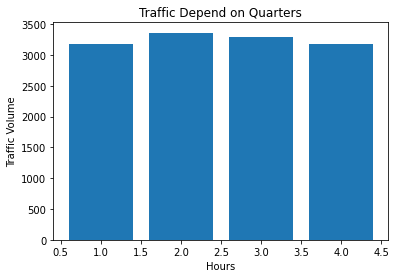

In [33]:
plt.bar(df.groupby("quarter")["traffic_volume"].mean().keys(),
        df.groupby("quarter")["traffic_volume"].mean().values)
plt.ylabel("Traffic Volume")
plt.xlabel("Hours")
plt.title("Traffic Depend on Quarters")
plt.show()

In [34]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,holiday_binary,temp_celsius,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,work_status
,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,0,15.13,9,1,4,10,2012,276,2,40,working hour
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,0,16.21,10,1,4,10,2012,276,2,40,working hour
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,0,16.43,11,1,4,10,2012,276,2,40,working hour
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,0,16.98,12,1,4,10,2012,276,2,40,working hour
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,0,17.99,13,1,4,10,2012,276,2,40,working hour


**Encoding and normalization**

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_enc = LabelEncoder()

In [41]:
for col in ["holiday","weather_main","weather_description","work_status"]:
    df[col] = label_enc.fit_transform(df[col])

In [42]:
for col in ["temp","rain_1h","snow_1h","clouds_all","temp_celsius"]:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [43]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,holiday_binary,temp_celsius,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,work_status
,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,7,0.673215,0.0,0.0,0.40,1,24,5545,0,0.673215,9,1,4,10,2012,276,2,40,1
2012-10-02 10:00:00,7,0.689412,0.0,0.0,0.75,1,2,4516,0,0.689412,10,1,4,10,2012,276,2,40,1
2012-10-02 11:00:00,7,0.692711,0.0,0.0,0.90,1,19,4767,0,0.692711,11,1,4,10,2012,276,2,40,1
2012-10-02 12:00:00,7,0.700960,0.0,0.0,0.90,1,19,5026,0,0.700960,12,1,4,10,2012,276,2,40,1
2012-10-02 13:00:00,7,0.716107,0.0,0.0,0.75,1,2,4918,0,0.716107,13,1,4,10,2012,276,2,40,1


In [60]:
df["2012-10-02"]["rain_1h"].cumsum()


2012-10-02 09:00:00    0.0
2012-10-02 10:00:00    0.0
2012-10-02 11:00:00    0.0
2012-10-02 12:00:00    0.0
2012-10-02 13:00:00    0.0
2012-10-02 14:00:00    0.0
2012-10-02 15:00:00    0.0
2012-10-02 16:00:00    0.0
2012-10-02 17:00:00    0.0
2012-10-02 18:00:00    0.0
2012-10-02 19:00:00    0.0
2012-10-02 20:00:00    0.0
2012-10-02 21:00:00    0.0
2012-10-02 22:00:00    0.0
2012-10-02 23:00:00    0.0
Name: rain_1h, dtype: float64

In [67]:
days = [pd.to_datetime(str(i)[:10]) for i in df.index]

In [71]:
days = sorted(set(days))

In [92]:
for date in tqdm(days):
    temporary = (df.index.day==date.day) & (df.index.month==date.month) & (df.index.year==date.year)
    df.loc[temporary,"rain_1h_cumsum"] = df[temporary]["rain_1h"].cumsum().values
    df.loc[temporary,"snow_1h_cumsum"] = df[temporary]["snow_1h"].cumsum().values

100%|██████████| 1860/1860 [00:28<00:00, 66.13it/s]


In [96]:
for col in ["rain_1h_cumsum","snow_1h_cumsum"]:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [101]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,holiday_binary,temp_celsius,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,work_status,rain_1h_cumsum,snow_1h_cumsum
,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,7,0.673215,0.0,0.0,0.40,1,24,5545,0,0.673215,...,1,4,10,2012,276,2,40,1,0.0,0.0
2012-10-02 10:00:00,7,0.689412,0.0,0.0,0.75,1,2,4516,0,0.689412,...,1,4,10,2012,276,2,40,1,0.0,0.0
2012-10-02 11:00:00,7,0.692711,0.0,0.0,0.90,1,19,4767,0,0.692711,...,1,4,10,2012,276,2,40,1,0.0,0.0
2012-10-02 12:00:00,7,0.700960,0.0,0.0,0.90,1,19,5026,0,0.700960,...,1,4,10,2012,276,2,40,1,0.0,0.0
2012-10-02 13:00:00,7,0.716107,0.0,0.0,0.75,1,2,4918,0,0.716107,...,1,4,10,2012,276,2,40,1,0.0,0.0


**Feature Selection**

In [102]:
# Pearson Correlation

corr = df.corr()
corr[corr["traffic_volume"].abs()>corr["traffic_volume"].abs().mean()]["traffic_volume"]

temp              0.132291
traffic_volume    1.000000
temp_celsius      0.132291
hour              0.352289
dayofweek        -0.149329
work_status       0.607019
Name: traffic_volume, dtype: float64

In [103]:
# Spearman Correlation

corr = df.corr("spearman")
corr[corr["traffic_volume"].abs()>corr["traffic_volume"].abs().mean()]["traffic_volume"]

temp              0.132589
traffic_volume    1.000000
temp_celsius      0.132589
hour              0.343992
dayofweek        -0.151154
work_status       0.594191
Name: traffic_volume, dtype: float64

In [105]:
# Recursive Feature Elimination

# https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example

from sklearn.feature_selection import RFE
import lightgbm

In [114]:
train_size = int(df.shape[0]*0.8)

X_train = df[:train_size].drop("traffic_volume", axis=1)
y_train = df[:train_size]["traffic_volume"]
X_test = df[train_size:].drop("traffic_volume", axis=1)
y_test = df[train_size:]["traffic_volume"]

In [115]:
regressor = lightgbm.LGBMRegressor()

n_features_to_select = 8
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=LGBMRegressor(), n_features_to_select=8)

In [123]:
for rank, name in zip(rfe.ranking_, rfe.feature_names_in_):
    if rank>rfe.ranking_.mean():
        print(rank, name)

8 holiday
12 snow_1h
5 weather_main
6 weather_description
11 holiday_binary
13 temp_celsius
9 quarter
7 work_status
10 snow_1h_cumsum


In [124]:
features = ["holiday", "snow_1h", "weather_main", "weather_description", "holiday_binary", 
           "temp_celsius", "quarter", "work_status", "snow_1h_cumsum"]

In [125]:
regressor.fit(X_train[features], y_train)

LGBMRegressor()

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
preds = regressor.predict(X_test[features])

mae_score = mean_absolute_error(y_test, preds)
rmse_score = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

In [128]:
print(f"MAE Score = {mae_score}\nRMSE Score = {rmse_score}\nR2 Score = {r2}")

MAE Score = 1198.0346264870768
RMSE Score = 1546.7630680323798
R2 Score = 0.3821821953152065


In [132]:
# df_feat_eng = df[features+["traffic_volume"]].copy()
# df_feat_eng.to_csv("df_feat_eng.csv")